### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2023 Semester 2

## Assignment 2

**Student Name:**    `TANZID SULTAN`

**Student ID:**     `1430660`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN training

The following code section will load the dataset from a folder that you specify. You may change the batch sizes and add additional data augmentation steps here if you wish.

In [ ]:
# library imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# make sure GPU is available
print(tf.config.list_physical_devices('GPU'))


In [91]:
from keras.preprocessing.image import ImageDataGenerator

data_dir = 'scene32' # SPECIFY YOUR PATH TO THE DATASET
batch_size = 100

# Data generator for training
# Additional data augmentation may be added here if desired
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,                    # flip horizontally
    rotation_range=10,                       # random rotations 
    width_shift_range=0.2,                   # random horizontal translations
    height_shift_range=0.2,                  # random vertical translations
    zoom_range=0.3,                          # random zooming
    shear_range=0.1,                         # random shearing  
    zca_whitening=True,
    fill_mode='nearest'
    )

# Data generator for test
# DO NOT USE DATA AUGMENTATION WITH TEST SET
test_datagen = ImageDataGenerator(
    rescale=1./255)

# Generate training data from 'train' directory
train_data = train_datagen.flow_from_directory(
        data_dir+'/train',
        target_size=(32,32),
        batch_size=batch_size,
        class_mode='categorical')

# Generate vaildation data from 'valid' directory
val_data = test_datagen.flow_from_directory(
        data_dir+'/valid',
        target_size=(32,32),
        batch_size=batch_size,
        class_mode='categorical')

# Generate test data from 'test' directory
test_data = test_datagen.flow_from_directory(
        data_dir+'/test',
        target_size=(32,32),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# Output list of class names
class_names_and_indices = train_data.class_indices
print(class_names_and_indices)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myModel.fit(train_data, validation_data=val_data, ...)

Found 1440 images belonging to 8 classes.
Found 320 images belonging to 8 classes.
Found 320 images belonging to 8 classes.
{'coast': 0, 'forest': 1, 'highway': 2, 'insidecity': 3, 'mountain': 4, 'opencountry': 5, 'street': 6, 'tallbuilding': 7}


#### CNN model according to specs

In [92]:
# build the model
cnn1 = keras.Sequential(
    [
        layers.Input((32,32,3)),                                       # input image shape is 32x32x3  
        layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
        layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
        layers.MaxPooling2D((2,2), strides=(2,2), padding='valid'),
        layers.Flatten(),                                              # unravel the 3d tensor from the previous layer output
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(8, activation='softmax')                          # output layer with 8 neurons, corresponding to the 8 categories
    ]
)


# configure the model
cnn1.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# display summary
cnn1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 3136)              0         
                                                                 
 dropout_10 (Dropout)        (None, 3136)              0         
                                                                 
 dense_34 (Dense)            (None, 64)                200768    
                                                     

In [93]:
# train the model again, this time with augmented images
history_cnn1_aug = cnn1.fit(train_data, validation_data=val_data, epochs=1200, verbose=2) 

Epoch 1/1200


2023-09-01 22:31:02.495273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 - 2s - loss: 2.0778 - accuracy: 0.1444 - val_loss: 2.0593 - val_accuracy: 0.2781 - 2s/epoch - 108ms/step
Epoch 2/1200


2023-09-01 22:31:03.983070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 - 1s - loss: 2.0515 - accuracy: 0.2444 - val_loss: 2.0286 - val_accuracy: 0.3000 - 566ms/epoch - 38ms/step
Epoch 3/1200
15/15 - 1s - loss: 2.0158 - accuracy: 0.2833 - val_loss: 1.9816 - val_accuracy: 0.3187 - 532ms/epoch - 35ms/step
Epoch 4/1200
15/15 - 1s - loss: 1.9589 - accuracy: 0.3458 - val_loss: 1.9047 - val_accuracy: 0.3906 - 547ms/epoch - 36ms/step
Epoch 5/1200
15/15 - 1s - loss: 1.8860 - accuracy: 0.3465 - val_loss: 1.8216 - val_accuracy: 0.4406 - 528ms/epoch - 35ms/step
Epoch 6/1200
15/15 - 1s - loss: 1.8081 - accuracy: 0.3778 - val_loss: 1.7428 - val_accuracy: 0.4594 - 551ms/epoch - 37ms/step
Epoch 7/1200
15/15 - 1s - loss: 1.7432 - accuracy: 0.4181 - val_loss: 1.6836 - val_accuracy: 0.4719 - 534ms/epoch - 36ms/step
Epoch 8/1200
15/15 - 1s - loss: 1.6784 - accuracy: 0.4375 - val_loss: 1.6185 - val_accuracy: 0.5219 - 572ms/epoch - 38ms/step
Epoch 9/1200
15/15 - 1s - loss: 1.6418 - accuracy: 0.4444 - val_loss: 1.5580 - val_accuracy: 0.5094 - 598ms/epoch - 40ms/step
Epoch

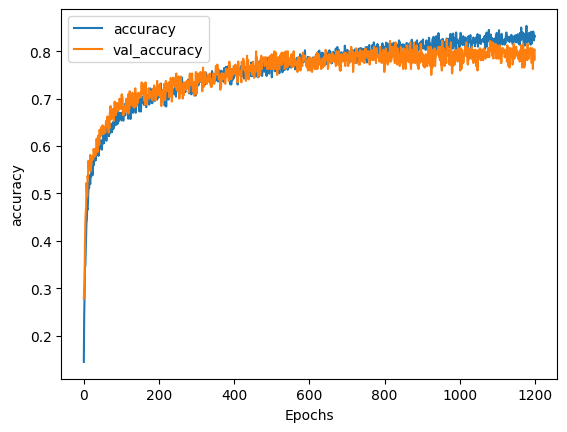

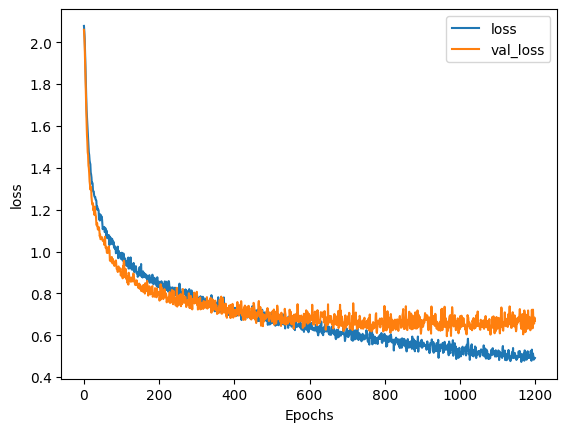

In [170]:
# plot some learning curves
def plot_graphs(training_history, metric):
    plt.plot(training_history.history[metric])
    plt.plot(training_history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history_cnn1_aug, "accuracy")
plot_graphs(history_cnn1_aug, "loss")

In [127]:
# Evaluate model performance on the test data
test_results = cnn1.evaluate(test_data)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4/4 [==============================] - 0s 19ms/step - loss: 0.5894 - accuracy: 0.8062
Test results - Loss: 0.5894333124160767 - Accuracy: 0.8062499761581421%


2023-09-01 23:51:43.003037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### 2. Error anaylsis

In [128]:
# compute predicted labels for test data
y_preds = np.argmax(cnn1.predict(test_data), axis=1) 

# actual labels
y = test_data.labels

n_class = 8
n_img_per_class = 40 

class_names = {c_index : c_name for (c_name, c_index) in class_names_and_indices.items()}
n_correct_tot = 0

# compute accuracy per class
for i in range(n_class):
    y_compare = np.equal(y_preds[i*n_img_per_class : (i+1)*n_img_per_class], y[i*n_img_per_class : (i+1)*n_img_per_class])
    n_correct = np.sum(y_compare)
    n_correct_tot += n_correct
    print(f"Class: {class_names[i]}, Number of correct predictions: {n_correct}, Accuracy: {n_correct/n_img_per_class}")

print(f"Overall classification accuracy for test data: {n_correct_tot/(n_class * n_img_per_class)}")

4/4 [==============================] - 0s 17ms/step
Class: coast, Number of correct predictions: 33, Accuracy: 0.825
Class: forest, Number of correct predictions: 34, Accuracy: 0.85
Class: highway, Number of correct predictions: 32, Accuracy: 0.8
Class: insidecity, Number of correct predictions: 38, Accuracy: 0.95
Class: mountain, Number of correct predictions: 28, Accuracy: 0.7
Class: opencountry, Number of correct predictions: 28, Accuracy: 0.7
Class: street, Number of correct predictions: 31, Accuracy: 0.775
Class: tallbuilding, Number of correct predictions: 34, Accuracy: 0.85
Overall classification accuracy for test data: 0.80625


2023-09-01 23:52:52.851100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### 3. Kernel engineering

#### CNN Model with only one Conv layer

In [182]:
# kernel size
k = 3

In [183]:
# build the model
cnn2 = keras.Sequential(
    [
        layers.Input((32,32,3)),                                       # input image shape is 32x32x3  
        layers.Conv2D(16, (k,k), padding='valid', activation='relu'),
        layers.MaxPooling2D((2,2), strides=(2,2), padding='valid'),
        layers.Flatten(),                                              # unravel the 3d tensor from the previous layer output
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(8, activation='softmax')                          # output layer with 8 neurons, corresponding to the 8 categories
    ]
)


# configure the model
cnn2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# display summary
cnn2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 3600)              0         
                                                                 
 dropout_16 (Dropout)        (None, 3600)              0         
                                                                 
 dense_46 (Dense)            (None, 64)                230464    
                                                                 
 dense_47 (Dense)            (None, 8)                 520       
                                                     

In [184]:
# train the model again, this time with augmented images
history_cnn2 = cnn2.fit(train_data, validation_data=val_data, epochs=800, verbose=2) 

Epoch 1/800


2023-09-02 01:05:30.072170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 - 1s - loss: 2.0772 - accuracy: 0.1597 - val_loss: 2.0529 - val_accuracy: 0.1937 - 1s/epoch - 93ms/step
Epoch 2/800


2023-09-02 01:05:31.351512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 - 1s - loss: 2.0387 - accuracy: 0.2146 - val_loss: 2.0120 - val_accuracy: 0.2906 - 564ms/epoch - 38ms/step
Epoch 3/800
15/15 - 1s - loss: 1.9984 - accuracy: 0.2493 - val_loss: 1.9601 - val_accuracy: 0.3313 - 540ms/epoch - 36ms/step
Epoch 4/800
15/15 - 1s - loss: 1.9482 - accuracy: 0.2972 - val_loss: 1.9068 - val_accuracy: 0.3844 - 516ms/epoch - 34ms/step
Epoch 5/800
15/15 - 1s - loss: 1.8981 - accuracy: 0.3319 - val_loss: 1.8551 - val_accuracy: 0.4531 - 516ms/epoch - 34ms/step
Epoch 6/800
15/15 - 1s - loss: 1.8478 - accuracy: 0.3889 - val_loss: 1.8007 - val_accuracy: 0.4062 - 524ms/epoch - 35ms/step
Epoch 7/800
15/15 - 1s - loss: 1.8030 - accuracy: 0.4146 - val_loss: 1.7507 - val_accuracy: 0.4781 - 527ms/epoch - 35ms/step
Epoch 8/800
15/15 - 1s - loss: 1.7594 - accuracy: 0.4326 - val_loss: 1.7061 - val_accuracy: 0.4750 - 500ms/epoch - 33ms/step
Epoch 9/800
15/15 - 1s - loss: 1.7157 - accuracy: 0.4326 - val_loss: 1.6640 - val_accuracy: 0.5000 - 531ms/epoch - 35ms/step
Epoch 10/800

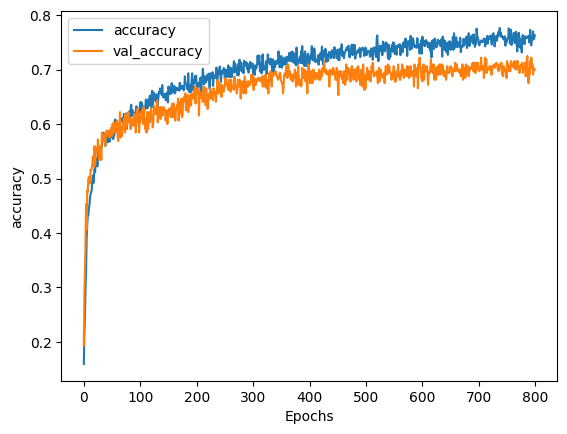

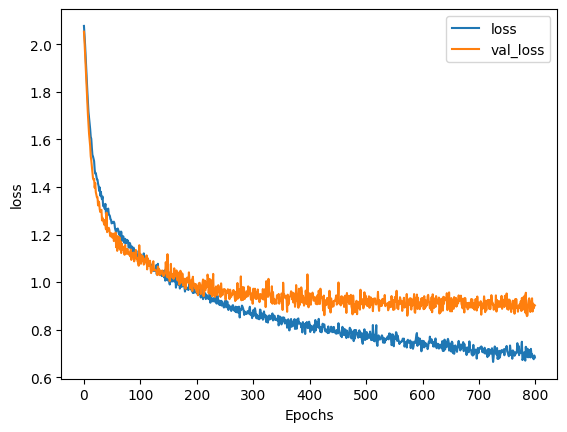

In [189]:
plot_graphs(history_cnn2, "accuracy")
plot_graphs(history_cnn2, "loss")

In [190]:
# Evaluate model performance on the test data
test_results = cnn2.evaluate(test_data)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4/4 [==============================] - 0s 26ms/step - loss: 0.7171 - accuracy: 0.7656
Test results - Loss: 0.7171003818511963 - Accuracy: 0.765625%


2023-09-02 07:41:01.297782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


#### Retrieve the kernels from the Conv2d layer

In [193]:
# get filter weights
filters, biases = cnn2.layers[0].get_weights()

# normalize the values to be in [0,1] for visualization purposes
f_min , f_max = filters.min(), filters.max()
filters = (filters-f_min) / (f_max- f_min)

#### Visualizing the kernels 

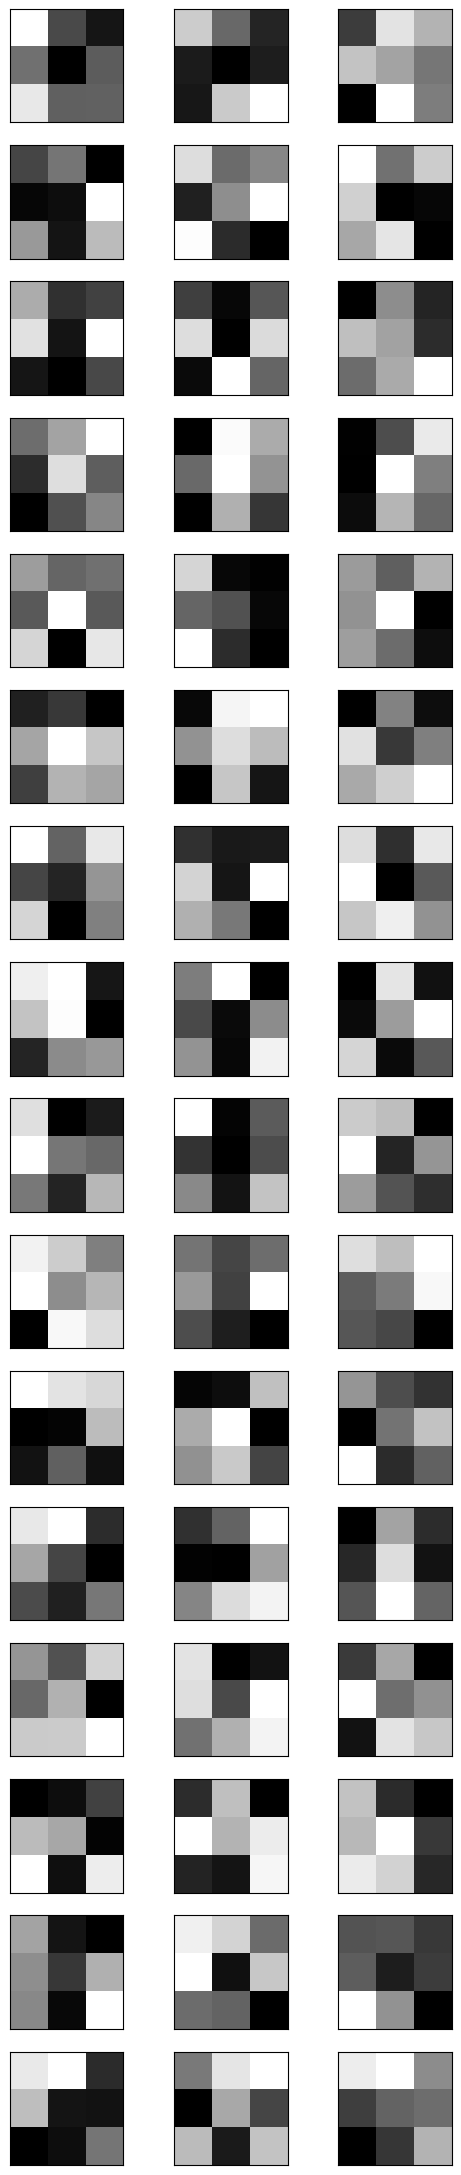

In [194]:
fig = plt.figure(figsize=(6, 28))
ix =  1

for i in range(16):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # subplot for 6 filters and 3 channels
        # specify subplot and turn of axis
        ax = plt.subplot(16, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# plot the filters
plt.show()